In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [4]:
train_dataset = pd.read_csv('train.csv')
valid_dataset = pd.read_csv('valid.csv')
test_dataset = pd.read_csv('test.csv')

# Label 04

In [5]:
label_4_train_ori = train_dataset.drop(columns=['label_1','label_3','label_2'])
label_4_valid_ori = valid_dataset.drop(columns=['label_1','label_3','label_2'])

## Handle Missing values

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(label_4_train_ori.isnull().sum())

There's no values missing in label_4.

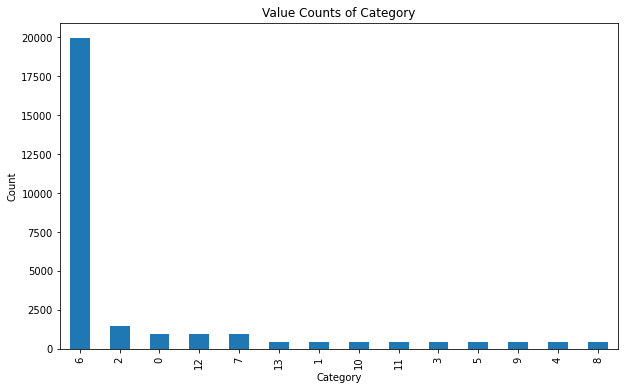

In [6]:
value_counts = label_4_train_ori['label_4'].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Without Feature Engineering or Hyperparameter tuning

In [7]:
X_train_label_4_ini = label_4_train_ori.drop(columns=['label_4'])
y_train_label_4_ini = label_4_train_ori['label_4']
X_valid_label_4_ini = label_4_valid_ori.drop(columns=['label_4'])
y_valid_label_4_ini = label_4_valid_ori['label_4']

In [15]:
scaler = StandardScaler()
X_train_scaled_label_4 = scaler.fit_transform(X_train_label_4_ini)
X_valid_scaled_label_4 = scaler.transform(X_valid_label_4_ini)

In [16]:
clf_1 = SVC()
clf_1.fit(X_train_scaled_label_4,y_train_label_4_ini)
predictions_label_4 = clf_1.predict(X_valid_scaled_label_4)

accuracy = accuracy_score(y_valid_label_4_ini, predictions_label_4)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.73%


In [ ]:
label_4_data_to_predict = test_dataset.drop(columns=['ID'])
scaled_data_label_4 = scaler.transform(label_4_data_to_predict)
final_label_4_predict = clf_1.predict(scaled_data_label_4)

In [ ]:
final_submission = "190601D_submission1.csv"
dataframe = pd.read_csv(final_submission)
dataframe['label_4'] = final_label_4_predict
dataframe.to_csv(final_submission,index=False)

## Handle class Imbalance

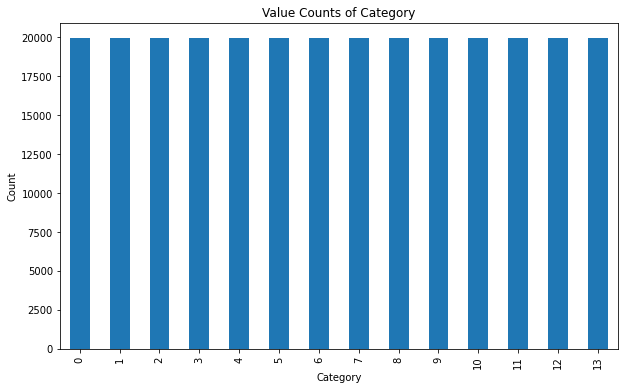

In [8]:
label_4_train_X = label_4_train_ori.drop(columns=['label_4'])
label_4_train_y = label_4_train_ori['label_4']

ros = RandomOverSampler(random_state=44)
X_resampled_label_4, y_resampled_label_4 = ros.fit_resample(label_4_train_X, label_4_train_y)
value_counts = y_resampled_label_4.value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Feature selection using K-best

In [ ]:
k_best = SelectKBest(score_func=f_classif, k=400)
X_train_selected_label_4 = k_best.fit_transform(X_train_label_4_ini, y_train_label_4_ini)
X_valid_selected_label_4 = k_best.transform(X_valid_label_4_ini)

## Feature selection using PCA

In [9]:
scaler = StandardScaler()
scaled_data_label_4 = scaler.fit_transform(X_resampled_label_4)
scaled_valid_data_label_4 = scaler.transform(X_valid_label_4_ini)

In [10]:
pca = PCA(n_components=0.96,svd_solver='full')
principal_components_label_4 = pca.fit_transform(scaled_data_label_4)
valid_principal_components_label_4 = pca.transform(scaled_valid_data_label_4)

In [11]:
principal_df_label_4 = pd.DataFrame(data=principal_components_label_4, columns=[f'new_feature_{i}' for i in range(principal_components_label_4.shape[1])])
valid_principal_df_label_4 = pd.DataFrame(data = valid_principal_components_label_4,columns=[f'new_feature_{i}' for i in range(valid_principal_components_label_4.shape[1])])

In [12]:
valid_principal_df_label_4.shape

(750, 336)

In [14]:
clf_2 = SVC()
clf_2.fit(principal_df_label_4,y_resampled_label_4)
predictions_label_4 = clf_2.predict(valid_principal_df_label_4)

accuracy = accuracy_score(y_valid_label_4_ini, predictions_label_4)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.33%


In [17]:
label_4_data_to_predict = test_dataset.drop(columns=['ID'])
PCA_analysis_df_test_scaled_label_4 = scaler.transform(label_4_data_to_predict)
test_principal_components_label_4 = pca.transform(PCA_analysis_df_test_scaled_label_4)
test_principal_df = pd.DataFrame(data = test_principal_components_label_4,columns=[f'new_feature_{i}' for i in range(test_principal_components_label_4.shape[1])])

final_label_4_predict = clf_2.predict(test_principal_df)

In [19]:
param_grid = {
    'n_neighbors': [1, 10, 20, 30, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

grid_search_label_4 = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search_label_4.fit(principal_df_label_4, y_resampled_label_4)

print("Best Parameters:", grid_search_label_4.best_params_)
print("Best Score:", grid_search_label_4.best_score_)

PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
valid_principal_df_label_4.shape

In [ ]:
y_pred_label_2 = grid_search_label_4.best_estimator_.predict(valid_principal_df_label_4)
accuracy_tuned = accuracy_score(y_pred_label_2, y_valid_label_4_ini)
print(f"Accuracy on validation data: {accuracy * 100:.2f}%")

## Make predictions & Test dataset

In [ ]:
label_3_data_to_predict = test_dataset.drop(columns=['ID'])
X_test_selected_label_3 = k_best.transform(label_3_data_to_predict)
PCA_analysis_df_test_scaled_label_3 = scaler.transform(X_test_selected_label_3)
test_principal_components_label_3 = pca.transform(PCA_analysis_df_test_scaled_label_3)
test_principal_df = pd.DataFrame(data = test_principal_components_label_3,columns=[f'new_feature_{i}' for i in range(test_principal_components_label_3.shape[1])])

final_label_3_predict = grid_search_label_2.best_estimator_.best_estimator_.predict(test_principal_df)

In [18]:
final_submission = "190601D_submission1.csv"
dataframe = pd.read_csv(final_submission)
dataframe['label_4'] = final_label_4_predict
dataframe.to_csv(final_submission,index=False)